ISABELA VICTÓRIA DE NOVAIS ROMANATO - RM: 550234


> "In God we trust, all others must bring data.”

**PONTOS EXTRAS DE ATIVIDADES:**

Exercício Poisson - 0.75

Exercício para casa - 0.5

Projeto Cartão de Crédito - vale 2.0 (mas ainda não sei quanto pontuei)


# CHECKPOINT 2

**Instruções**

- Criar uma regressão linear que utilize a variável categórica e explique o aumento de vendas (3 pontos)

- Criar uma regressão polinomial que utilize a variável categórica e explique o aumento de vendas (1 pontos)

- Testar o R² da sua regressão linear usando bases de teste e um teste de hipóteses. (1 ponto)

- Sua regressão linear obteve um R² de pelo menos 70% (1 ponto)

- Sua regressão linear obteve um R ² de pelo menos 90% (1 ponto)

- Sua regressão linear obteve um R² de pelo menos 95% (1 ponto)

- Analise os coeficientes da regressão linear e indique quantos reais de vendas são gerados a partir de um real investido em cada categoria. Qual categoria tem o melhor retorno? E o pior retorno? (2 pontos)



**Dicas:**

1. Transforme seus dados. A base de dados apresenta várias linhas de ROI para o mesmo mês. Tente concentrar o ROI de um dado mês em uma única linha. Analise o que acontece com a variável categórica do modelo. Transforme-a adequadamente.
2. Todas as transformações devem ser feitas em Python.
3. Entregue um arquivo .ipynb. Outros formatos serão desconsiderados.
4. Prazo limite até 9:00 AM de 25/5/2024
5. Atividade individual.




#### Importar as bibliotecas

In [440]:
#!pip install statsmodels

In [441]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
import scipy.stats .stats as stats
from sklearn.preprocessing import PolynomialFeatures

#### Carregar o conjunnto de dados

In [442]:
df = pd.read_csv("Gastos_Publicidade_MelhoresCompras 1.csv", decimal=",")

In [443]:
df = df.rename(columns={
    'Previsao Inicial de Aumento de Vendas (em mil unidades)': 'ROI',
    'Gastos com Publicidade (em R$)': 'Investimento'})

In [444]:
df.value_counts('Tipo de Midia')

Tipo de Midia
Jornal           31
Paginas web      31
Radio            31
Redes sociais    31
Revista          31
TV               31
Google            7
Instagram         7
Name: count, dtype: int64

In [445]:
df.isnull().sum()

Ano              0
Mes              0
Tipo de Midia    0
Investimento     0
ROI              0
dtype: int64

#### Transformar "Investimento" para a mesma grandeza da coluna "ROI"

In [446]:
df['Investimento'] = df['Investimento'] / 1000

#### Tratar a coluna categórica para dummie

In [447]:
colunas = {
    'pag_web': 'Paginas web',
    'social': 'Redes sociais',
    'tv': 'TV',
    'radio': 'Radio',
    'jornal': 'Jornal',
    'revista': 'Revista',
    'google': 'Google',
    'instagram': 'Instagram'
}
for chave, valor in colunas.items():
  df[chave]  = df.apply(lambda row: 1 if row['Tipo de Midia'] == valor else 0, axis=1)

In [448]:
df

,Ano,Mes,Tipo de Midia,Investimento,ROI,pag_web,social,tv,radio,jornal,revista,google,instagram
0,2022,1,Paginas web,87.000,1000,1,0,0,0,0,0,0,0
1,2022,1,Redes sociais,120.000,800,0,1,0,0,0,0,0,0
2,2022,1,TV,250.000,1500,0,0,1,0,0,0,0,0
3,2022,1,Jornal,110.000,730,0,0,0,0,1,0,0,0
4,2022,1,Revista,40.000,360,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2024,7,Redes sociais,308.000,2951,0,1,0,0,0,0,0,0
196,2024,7,TV,335.664,2924,0,0,1,0,0,0,0,0
197,2024,7,Jornal,213.248,2529,0,0,0,0,1,0,0,0
198,2024,7,Revista,145.152,1638,0,0,0,0,0,1,0,0


#### Concentrar o ROI de um dado mês em uma única linha

In [449]:
colunas_roi = []
colunas_investimento = []

In [450]:
for coluna in colunas.keys():
    df['inv_' + coluna] = df[coluna] * df['Investimento']
    df['roi_' + coluna] = df[coluna] * df['ROI']
    colunas_investimento.append('inv_' + coluna)
    colunas_roi.append('roi_' + coluna)

df = df.groupby(['Ano', 'Mes'])[colunas_roi + colunas_investimento].sum()

In [451]:
df

roi_pag_web  roi_social  roi_tv  roi_radio  roi_jornal  roi_revista  \
Ano  Mes                                                                        
2022 1           1000         800    1500        450         730          360   
     2            980         750    1300        400         700          330   
     3           1400        1100    1400        600         730          500   
     4           1600        1200    1700        600         880          550   
     5           1900        1700    1700        900         990          700   
     6           1700        1500    1300        620         800          550   
     7           2500        2300    2100       1100        1800         1300   
     8            970         700     900          0         500          320   
     9           1600        1400    1200        800         700          500   
     10          2500        2300    2100       1100        1800         1300   
     11          2500        2400    2100       1500        1400         1300   
     12          2500        2700    2600       1500        1900         1700   
2023 1           1166        1040    2089        564         916          420   
     2           1229         941    1516        502         878          414   
     3           1633        1380    1756        753         916          583   
     4           2007        1400    2132        753        1104          642   
     5           2383        1983    2132       1129        1242          816   
     6           2132        1750    1631        778        1004          642   
     7           3136        2683    2634       1380        2258         1516   
     8           1217         816    1129          0         583          373   
     9           1866        1633    1400        933         878          583   
     10          2916        2683    2449       1283        2100         1516   
     11          3136        3011    2634       1750        1633         1516   
     12          2916        3149    3261       1750        2383         1983   
2024 1           1190        1102    2193        593         925          437   
     2           1328        1025    1668        512         975          464   
     3           1649        1435    1844        813         971          624   
     4           2228        1568    2175        760        1170          674   
     5           2526        2122    2303       1253        1354          898   
     6           2260        1837    1647        824        1044          674   
     7           3418        2951    2924       1504        2529         1638   

          roi_google  roi_instagram  inv_pag_web  inv_social   inv_tv  \
Ano  Mes                                                                
2022 1             0              0      87.0000     120.000  250.000   
     2             0              0      80.0000     110.000  200.000   
     3             0              0     120.0000     140.000  220.000   
     4             0              0     125.0000     140.000  280.000   
     5             0              0     150.0000     220.000  270.000   
     6             0              0     120.0000     180.000  230.000   
     7             0              0     190.0000     250.000  270.000   
     8             0              0      82.0000     101.000  120.000   
     9             0              0     118.8000     175.000  225.000   
     10            0              0     190.0000     250.000  270.000   
     11            0              0     210.0000     240.000  290.000   
     12            0              0     260.0000     270.000  290.000   
2023 1             0              0      97.4400     136.800  295.000   
     2             0              0      89.6000     123.200  224.000   
     3             0              0     134.4000     156.800  246.400   
     4             0              0     140.0000     156.800  313.600   
     5             0  

In [452]:
df['roi'] = 0
df['inv'] = 0
for coluna in colunas.keys():
    df['roi'] = df['roi'] + df['roi_' + coluna]
    df['inv'] = df['inv'] + df['inv_' + coluna]
    del df ['roi_' + coluna]
df

inv_pag_web  inv_social   inv_tv  inv_radio  inv_jornal  \
Ano  Mes                                                            
2022 1        87.0000     120.000  250.000    75.0000    110.0000   
     2        80.0000     110.000  200.000    50.0000     90.0000   
     3       120.0000     140.000  220.000    70.0000    110.0000   
     4       125.0000     140.000  280.000    90.0000    130.0000   
     5       150.0000     220.000  270.000   110.0000    150.0000   
     6       120.0000     180.000  230.000    87.0000    122.0000   
     7       190.0000     250.000  270.000   110.0000    170.0000   
     8        82.0000     101.000  120.000     0.0000     70.0000   
     9       118.8000     175.000  225.000    92.0000    119.0000   
     10      190.0000     250.000  270.000   110.0000    170.0000   
     11      210.0000     240.000  290.000   150.0000    170.0000   
     12      260.0000     270.000  290.000   140.0000    190.0000   
2023 1        97.4400     136.800  295.000    84.0000    123.2000   
     2        89.6000     123.200  224.000    56.0000    100.8000   
     3       134.4000     156.800  246.400    78.4000    123.2000   
     4       140.0000     156.800  313.600   100.8000    145.6000   
     5       168.0000     246.400  302.400   123.2000    168.0000   
     6       134.4000     201.600  257.600    97.4400    136.6400   
     7       212.8000     280.000  302.400   123.2000    190.4000   
     8        91.8400     113.120  134.400     0.0000     78.4000   
     9       133.0560     196.000  252.000   103.0400    133.2800   
     10      212.8000     280.000  302.400   123.2000    190.4000   
     11      235.2000     268.800  324.800   168.0000    190.4000   
     12      291.2000     302.400  324.800   156.8000    212.8000   
2024 1        99.3888     145.008  309.750    88.2000    124.4320   
     2        96.7680     134.288  246.400    57.1200    111.8880   
     3       135.7440     163.072  258.720    84.6720    130.5920   
     4       155.4000     175.616  319.872   101.8080    154.3360   
     5       178.0800     263.648  326.592   136.7520    183.1200   
     6       142.4640     211.680  260.176   103.2864    142.1056   
     7       231.9520     308.000  335.664   134.2880    213.2480   

          inv_revista  inv_google  inv_instagram    roi        inv  
Ano  Mes                                                            
2022 1         40.000         0.0           0.00   4840   682.0000  
     2         30.000         0.0           0.00   4460   560.0000  
     3         60.000         0.0           0.00   5730   720.0000  
     4         60.000         0.0           0.00   6530   825.0000  
     5         80.000         0.0           0.00   7890   980.0000  
     6         66.000         0.0           0.00   6470   805.0000  
     7        120.000         0.0           0.00  11100  1110.0000  
     8         22.000         0.0           0.00   3390   395.0000  
     9         60.000         0.0           0.00   6200   789.8000  
     10       120.000         0.0           0.00  11100  1110.0000  
     11       120.000         0.0           0.00  11200  1180.0000  
     12       150.000         0.0           0.00  12900  1300.0000  
2023 1         44.800         0.0           0.00   6195   781.2400  
     2         33.600         0.0           0.00   5480   627.2000  
     3         67.200         0.0           0.00   7021   806.4000  
     4         67.200         0.0           0.00   8038   924.0000  
     5         89.600         0.0           0.00   9685  1097.6000  
     6         73.920         0.0           0.00   7937   901.6000  
     7        134.400         0.0           0.00  13607  1243.2000  
     8         24.640         0.0           0.00   4118   442.4000  
     9         67.200         0.0           0.00   7293   884.5760  
     10       134.400         0.0           0.00  12947  1243.2000  
     11       134.400         0.0           0.00  13680  1321.6000  
     12

#### Matriz de correlação




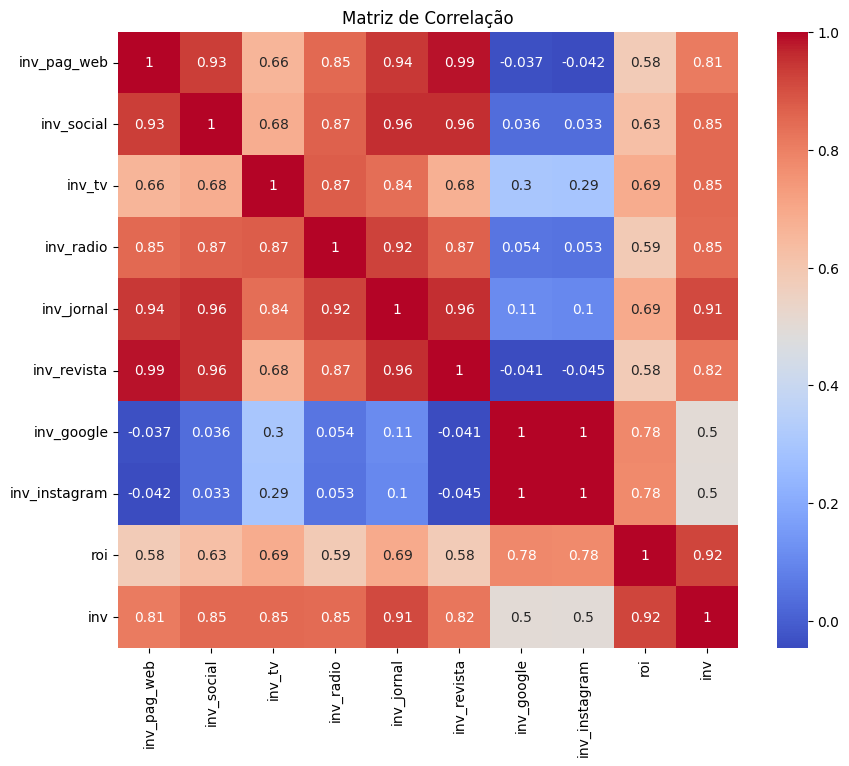

In [453]:
corr = df.corr()
plt.figure(figsize=(10, 8))
# Crie um heatmap da matriz de correlação
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()


Regressão linear

In [454]:
X = df[colunas_investimento].to_numpy()
Y = df['roi'].to_numpy()
model = LinearRegression(n_jobs=None, fit_intercept=True)
model.fit(X, Y)
model.score(X, Y)

0.9942879786479485

#### Regressão Polinomial

In [455]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
model_poly = LinearRegression(n_jobs=None, fit_intercept=True)
model_poly.fit(X_poly, Y)
model_poly.score(X_poly, Y)

0.9997010147066847

#### Visualizar quantidade de linhas

In [456]:
df.count()

inv_pag_web      31
inv_social       31
inv_tv           31
inv_radio        31
inv_jornal       31
inv_revista      31
inv_google       31
inv_instagram    31
roi              31
inv              31
dtype: int64

#### Dividir minha base total em teste e treino

In [457]:
#saber quantas linhas
#df.count()

# dividir minha base total em base de treino - usar metade
df_train = df.sample(15)

#retirar da base principal os meus treinos
df = df.drop(df_train.index)

#crio uma lista com 10 amostras e 8 observações cada a apartir das obs que sobraram
# após a retirada das obs de treino. HAVERÁ REPETIÇÃO
samples = []
for i in range(10):
  samples.append(df.sample(8))

  print(samples)

[          inv_pag_web  inv_social   inv_tv  inv_radio  inv_jornal  \
Ano  Mes                                                            
2023 5        168.000      246.40  302.400   123.2000    168.0000   
2022 5        150.000      220.00  270.000   110.0000    150.0000   
     11       210.000      240.00  290.000   150.0000    170.0000   
2024 6        142.464      211.68  260.176   103.2864    142.1056   
2023 7        212.800      280.00  302.400   123.2000    190.4000   
2022 4        125.000      140.00  280.000    90.0000    130.0000   
2023 4        140.000      156.80  313.600   100.8000    145.6000   
2022 3        120.000      140.00  220.000    70.0000    110.0000   

          inv_revista  inv_google  inv_instagram    roi       inv  
Ano  Mes                                                           
2023 5         89.600         0.0            0.0   9685  1097.600  
2022 5         80.000         0.0            0.0   7890   980.000  
     11       120.000         0.0   

In [458]:
X_train = df_train[colunas_investimento].to_numpy()
#variável de interesse
Y_train = df_train[['roi']].to_numpy()

#### Criar modelo de regressão linear

In [459]:
model_linear = LinearRegression()
model_linear.fit(X_train, Y_train)
score_linear = model_linear.score(X_train, Y_train)
print(score_linear)

0.9990846416141487


#### Começar a treinar o modelo

In [460]:
test_score_linear = []

for sample in samples:
  #Criando variaveis X, Y para regressao linear
  X_test = sample [colunas_investimento].to_numpy()
  Y_test = sample [['roi']].to_numpy()
  test_score_linear.append(model_linear.score(X_test, Y_test))

alpha = 0.1

Teste de hipótese para Regressão Linear

In [461]:
t_stat, p_valor = stats.ttest_1samp(test_score_linear, popmean=score_linear)
print(score_linear)
print(test_score_linear)
if p_valor < alpha:
  print('Regressão Linear: Aceite H1 e rejeito H0')
else:
  print('Regressão Linear: Aceito H0 e rejeito H1')

0.9990846416141487
[0.9801369494763593, 0.9946066877562365, 0.9935888779564735, 0.9821233702420338, 0.9807427819275103, 0.9896898640285388, 0.9911230351560717, 0.9958100491625845, 0.9549484867041828, 0.9928564261922448]
Regressão Linear: Aceite H1 e rejeito H0


<ipython-input-461-6e80666a2782>:1: DeprecationWarning: Please use `ttest_1samp` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_stat, p_valor = stats.ttest_1samp(test_score_linear, popmean=score_linear)


In [462]:
print(colunas_investimento)

['inv_pag_web', 'inv_social', 'inv_tv', 'inv_radio', 'inv_jornal', 'inv_revista', 'inv_google', 'inv_instagram']


In [463]:
x = sm.add_constant(X_train)
model = sm.OLS(Y_train, x)
resultado = model.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     818.6
Date:                Fri, 24 May 2024   Prob (F-statistic):           1.53e-08
Time:                        01:46:31   Log-Likelihood:                -96.032
No. Observations:                  15   AIC:                             210.1
Df Residuals:                       6   BIC:                             216.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2888.5677    793.408     -3.641      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [464]:
# Coeficientes da regressão linear
coefs = resultado.params
for i, coluna in enumerate(colunas_investimento):
  print(f"Um real investido em {coluna} o efeito no retorno (ROI) é de {coefs[i+1]}.")

Um real investido em inv_pag_web o efeito no retorno (ROI) é de 10.564466696140812.
Um real investido em inv_social o efeito no retorno (ROI) é de 18.9377411125649.
Um real investido em inv_tv o efeito no retorno (ROI) é de 18.546223136215588.
Um real investido em inv_radio o efeito no retorno (ROI) é de -29.445628691185345.
Um real investido em inv_jornal o efeito no retorno (ROI) é de 7.93528701994444.
Um real investido em inv_revista o efeito no retorno (ROI) é de 34.65044942788427.
Um real investido em inv_google o efeito no retorno (ROI) é de 45.14467208980909.
Um real investido em inv_instagram o efeito no retorno (ROI) é de 16.480755062712547.


In [465]:
# Melhor retorno
melhor_retorno = colunas_investimento[np.argmax(resultado.params[1:])]
print(f"Melhor retorno: {melhor_retorno}")

# Pior retorno
pior_retorno = colunas_investimento[np.argmin(resultado.params[1:])]
print(f"Pior retorno: {pior_retorno}")


Melhor retorno: inv_google
Pior retorno: inv_radio


A partir da análise realizada é possível considerar que a categoria que gera melhor retorno é '**inv_google**' e a categoria que gera pior retorno é '**inv_radio**'.